# Robust portfolio optimization

In this notebook we explore three methods of portfolio oprimization, including well-known Markowitz optimization and its robust alternatives - Resampling and Black-Litterman model.

First of all, we need to import packages that we will use to run our codes. Becides the standard modules, we created our own functions. These functions are are located in the accompanying file called 'functions.py', we import it by typing "import functions as fun".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import functions as fun  # This is our own module that we need to import
%load_ext autoreload
%autoreload 2

## 1. Markowitz Mean-Variance Optimization

In this section we will do the following:

1) We import data needed for the model: expected returns, covariance matrices, and risk-free rate:
- risk-free rate is assumed to be 1.5%;
- expected returns are annualized historical returns;
- covariance matrices are also annualized.

We take historical data for the period of one year only. We start with the year 2010.

2) Using this data, we run two fuctions from our own module - fun.msr() and fun.gmv(), they give us weights of the two portfolios that are located on the efficient frontier: 
- Maximum Sharpe Ratio portfolio (abbreviated as MSR): this is a porfolio that is build from the available stocks and that has the highest Sharpe ratio compared to all the other portfolios that can be constructed from the given assets.
- Global Minimum Variance portfolio (abbreviated as GMV): this is a portfolio that has the lowest possible volatility.

The following constraint is considered when building portfolios: the sum of the weights is equal to 100%, this implies that:
- no shorting is allowed (the sum of weights cannot be larger than 100%).
- we are fully invested in risky assets, we don't use a risk-free asset in our portfoio (the sum cannot be smaller than 100%).

This way we get in-sample portfolios for the year 2010. We will compute their returns and volatilies. These weights we will use as a guidance for allocation of our assets for the next year - 2011.

3) Then we are interested in knowing what returns and volatilities our portfolios would give us as the year 2011 ends; these are so-called out-of-sample portfolios' characteristics.

For this, we need historical returns and volatilities of the constituents of our portfolios for the year 2011. With this, we can compare our portfolios' returns and volalities that we expected and that we actually got.

4) For comparison, we also compute "ideal" allocation for MSR and GMV portfolios (and their returns and voltilities), based on historical risk-return characterictics of the stocks for the year 2011 (in-sample portfolios for the year 2011). These are the "best possible" portfolios that we could have gotten if we had a gift of clairvoyance. Let us see how far (or close) our real portfolios and those that we expected, are from these "best" portfolios.

### 1.1. In-sample portfolios (2010)

1.1.1. Let us upload data for 2010 from the provided excel file "Data".

In [2]:
rf = 0.015

In [3]:
ann_returns_2010 = pd.read_excel('Data.xlsx','Annualized returns', index_col=[0])['2010']
ann_returns_2010

AHOLD DELHAIZE      0.062434
L'AIR LIQUIDE       0.217657
BASF                0.373677
SAINT GOBAIN        0.011295
ENDESA             -0.194195
KERING              0.412631
L'OREAL             0.065128
LVMH                0.570554
MUNICH INSURANCE    0.043986
SANOFI             -0.130948
Name: 2010, dtype: float64

In [4]:
ann_cov_2010 = pd.read_excel('Data.xlsx','Covariance 2010',index_col=[0])
ann_cov_2010.head()

,AHOLD DELHAIZE,L'AIR LIQUIDE,BASF,SAINT GOBAIN,ENDESA,KERING,L'OREAL,LVMH,MUNICH INSURANCE,SANOFI
AHOLD DELHAIZE,0.027750,0.016768,0.012931,0.023525,0.016914,0.017910,0.012681,0.019016,0.009400,0.014142
L'AIR LIQUIDE,0.016768,0.061579,0.051749,0.068990,0.035780,0.044785,0.040723,0.056094,0.027330,0.038548
BASF,0.012931,0.051749,0.072493,0.068341,0.031458,0.048982,0.041764,0.058895,0.030578,0.038265
SAINT GOBAIN,0.023525,0.068990,0.068341,0.128862,0.054105,0.064919,0.054502,0.078701,0.037600,0.049860
ENDESA,0.016914,0.035780,0.031458,0.054105,0.063525,0.037132,0.027936,0.040056,0.023004,0.028036


1.1.2. Using two functions from our module (fun.msr() and fun.gmv()), we get weights of MSR and GMV portfolios for the year 2010:

In [5]:
msr_2010 = fun.msr(rf, ann_returns_2010, ann_cov_2010)
gmv_2010 = fun.gmv(ann_cov_2010)
pd.DataFrame({'Weights in-sample MSR 2010': msr_2010.round(4),
             'Weights in-sample GMV 2010': gmv_2010.round(4)}, ann_returns_2010.index)

,Weights in-sample MSR 2010,Weights in-sample GMV 2010
AHOLD DELHAIZE,0.0000,0.5395
L'AIR LIQUIDE,0.0000,0.0000
BASF,0.0000,0.0000
SAINT GOBAIN,0.0000,0.0000
ENDESA,0.0000,0.0000
KERING,0.0939,0.0000
L'OREAL,0.0000,0.0394
LVMH,0.9061,0.0000
MUNICH INSURANCE,0.0000,0.3836
SANOFI,0.0000,0.0374


From the table above we can see that our MSR portfolio consists of two stocks only, meaning it is not well-diversified, plus constituents' weights are not balanced (KERING 9.39% and LVMH 90.61%).

As for the GMV portfolio, it contains more assets, that are different from those contained in the MSR portfolio, but they are also quite concentrated (AHOLD DELHAIZE 53.95%, L'OREAL 03.94%, MUNICH INSURANCE 38.36%, SANOFI 3.74%). 

1.1.3. Now, let us calculate our portfolios' risk-return characteristics (in-sample parameters for the year 2010):

In [6]:
# MSR portfolio
ret_msr_2010 = fun.portfolio_return(msr_2010, ann_returns_2010)
vol_msr_2010 = fun.portfolio_vol(msr_2010, ann_cov_2010)
sharpe_msr_2010 = fun.sharpe(ret_msr_2010, vol_msr_2010, rf)

# GMV portfolio
ret_gmv_2010 = fun.portfolio_return(gmv_2010, ann_returns_2010)
vol_gmv_2010 = fun.portfolio_vol(gmv_2010, ann_cov_2010)
sharpe_gmv_2010 = fun.sharpe(ret_gmv_2010, vol_gmv_2010, rf)

# Putting everything in a table
pd.concat([pd.DataFrame({'In-sample MSR 2010': ret_msr_2010.round(4),
             'In-sample GMV 2010': ret_gmv_2010.round(4)}, index = ['Portfolio return']),
           pd.DataFrame({'In-sample MSR 2010': vol_msr_2010.round(4),
             'In-sample GMV 2010': vol_gmv_2010.round(4)}, index = ['Portfolio volatility']),
          pd.DataFrame({'In-sample MSR 2010': sharpe_msr_2010.round(2),
             'In-sample GMV 2010': sharpe_gmv_2010.round(2)}, index = ['Sharpe ratio'])
          ], axis=0)

,In-sample MSR 2010,In-sample GMV 2010
Portfolio return,0.5557,0.0482
Portfolio volatility,0.2847,0.1400
Sharpe ratio,1.9000,0.2400


### 1.2. Out-of-sample portfolios (2011)

1.2.1. From the same excel file, let us upload data for the year 2011.

In [7]:
ann_returns_2011 = pd.read_excel('Data.xlsx','Annualized returns',index_col=[0])['2011']
ann_returns_2011.round(4)

AHOLD DELHAIZE      0.0576
L'AIR LIQUIDE       0.0100
BASF               -0.0973
SAINT GOBAIN       -0.2295
ENDESA             -0.1785
KERING             -0.0702
L'OREAL            -0.0286
LVMH               -0.1113
MUNICH INSURANCE   -0.1646
SANOFI              0.1860
Name: 2011, dtype: float64

In [8]:
ann_cov_2011 = pd.read_excel('Data.xlsx','Covariance 2011',index_col=[0])
ann_cov_2011.head()

,AHOLD DELHAIZE,L'AIR LIQUIDE,BASF,SAINT GOBAIN,ENDESA,KERING,L'OREAL,LVMH,MUNICH INSURANCE,SANOFI
AHOLD DELHAIZE,0.034979,0.021325,0.031700,0.036684,0.025863,0.024650,0.018881,0.024795,0.029608,0.023963
L'AIR LIQUIDE,0.021325,0.056416,0.068911,0.079857,0.045677,0.052329,0.036390,0.056463,0.051929,0.043751
BASF,0.031700,0.068911,0.123701,0.115596,0.067719,0.077353,0.051038,0.082154,0.080485,0.061491
SAINT GOBAIN,0.036684,0.079857,0.115596,0.181559,0.088856,0.095405,0.063138,0.102916,0.098725,0.075509
ENDESA,0.025863,0.045677,0.067719,0.088856,0.087417,0.050718,0.036573,0.057434,0.066297,0.048306


1.2.2. Based on the weights above (subsection 1.1.2) and risk-return characteristics that our stocks had in 2011, we calculate returns and volatilities of our "real" portfolios (out-of-sample portfolios' parameters of the year 2011):

In [9]:
# MSR portfolio
ret_out_msr_2011 = fun.portfolio_return(msr_2010, ann_returns_2011)
vol_out_msr_2011 = fun.portfolio_vol(msr_2010, ann_cov_2011)
sharpe_out_msr_2011 = fun.sharpe(ret_out_msr_2011, vol_out_msr_2011, rf)

# GMV portfolio
ret_out_gmv_2011 = fun.portfolio_return(gmv_2010, ann_returns_2011)
vol_out_gmv_2011 = fun.portfolio_vol(gmv_2010, ann_cov_2011)
sharpe_out_gmv_2011 = fun.sharpe(ret_out_gmv_2011, vol_out_gmv_2011, rf)

# Putting the computed characteristics into a table
pd.concat([pd.DataFrame({'Out-of-sample MSR 2011': ret_out_msr_2011.round(4),
             'Out-of-sample GMV 2011': ret_out_gmv_2011.round(4)}, index = ['Portfolio return']),
           pd.DataFrame({'Out-of-sample MSR 2011': vol_out_msr_2011.round(4),
             'Out-of-sample GMV 2011': vol_out_gmv_2011.round(4)}, index = ['Portfolio volatility']),
          pd.DataFrame({'Out-of-sample MSR 2011': sharpe_out_msr_2011.round(2),
             'Out-of-sample GMV 2011': sharpe_out_gmv_2011.round(2)}, index = ['Sharpe ratio'])
          ], axis=0)

,Out-of-sample MSR 2011,Out-of-sample GMV 2011
Portfolio return,-0.1074,-0.0262
Portfolio volatility,0.3149,0.2040
Sharpe ratio,-0.3900,-0.2000


#### If we compare in-sample portfolios of 2010 (what we expected) and out-of-sample portfolios of 2011 (our realized portfolios), we can see that:

- with MSR we expected to earn almost 1.90% per unit of risk (with total portfolio return being 55.57% and volatility of 28.47%), but in reality we ended up with a negative return of -0.39% per unit of risk (total portfolio return is -10.74% and volatility is 31.48%);

- with GMV we expected our portfolio volatility to be 14% (with total portfolio return of 4.82% and Sharpe ratio of 0.24%), but in reality our portfolio had the volatility of 20.40% (total portfolio return is -2.62% and Sharpe ratio is -0.2% per unit of risk).

This lead to a conclusion that using historical parameters of a previous period to allocate assets for the next period does not guarantee that we get performance that we expect to have. 

### 1.3. In-sample portfolios (2011) and efficient frontiers

1.3.1. Next questions that would be interesting to look at are: 
- What actually our in-sample portfolios in 2011 are? 
- What allocation could give us the highest Sharpe ratio (relevant for MSR) and the lowest volatility (relevant for GMV)?

Weights of in-sample MSR and GMV portfolios are:

In [10]:
msr_2011 = fun.msr(rf,ann_returns_2011,ann_cov_2011)  
gmv_2011 = gmv_2011 = fun.gmv(ann_cov_2011)
pd.DataFrame({'Weights in-sample MSR 2011': msr_2011.round(4),
             'Weights in-sample GMV 2011': gmv_2011.round(4)}, ann_returns_2011.index)

,Weights in-sample MSR 2011,Weights in-sample GMV 2011
AHOLD DELHAIZE,0.0,0.6058
L'AIR LIQUIDE,0.0,0.0779
BASF,0.0,0.0000
SAINT GOBAIN,0.0,0.0000
ENDESA,0.0,0.0000
KERING,0.0,0.0000
L'OREAL,0.0,0.3163
LVMH,0.0,0.0000
MUNICH INSURANCE,0.0,0.0000
SANOFI,1.0,0.0000


From the table we can see that we should have allocated 100% to SANOFI (for MSR portfolio), but we invested in absolutely different stocks.

With GMV, we "guessed" right two assets out of three (AHOLD DELHAIZE and L'OREAL), but we were not very precise in "guessing" their weights (for example, we allocated 3.94% to L'OREAL, but should have allocated 31.63%) .

Now, let us compute risk-return characteristics of the in-sample MSR and GMV portfolios (2011).

In [11]:
# MSR portfolio
ret_msr_2011 = fun.portfolio_return(msr_2011, ann_returns_2011)
vol_msr_2011 = fun.portfolio_vol(msr_2011, ann_cov_2011)
sharpe_msr_2011 = fun.sharpe(ret_msr_2011, vol_msr_2011, rf)

# GMV portfolio
ret_gmv_2011 = fun.portfolio_return(gmv_2011, ann_returns_2011)
vol_gmv_2011 = fun.portfolio_vol(gmv_2011, ann_cov_2011)
sharpe_gmv_2011 = fun.sharpe(ret_gmv_2011, vol_gmv_2011, rf)

# Putting the computed characteristics into a table
pd.concat([pd.DataFrame({'In-sample MSR 2011': ret_msr_2011.round(4),
             'In-sample GMV 2011': ret_gmv_2011.round(4)}, index = ['Portfolio return']),
           pd.DataFrame({'In-sample MSR 2011': vol_msr_2011.round(4),
             'In-sample GMV 2011': vol_gmv_2011.round(4)}, index = ['Portfolio volatility']),
          pd.DataFrame({'In-sample MSR 2011': sharpe_msr_2011.round(2),
             'In-sample GMV 2011': sharpe_gmv_2011.round(2)}, index = ['Sharpe ratio'])
          ], axis=0)

,In-sample MSR 2011,In-sample GMV 2011
Portfolio return,0.186,0.0266
Portfolio volatility,0.260,0.1698
Sharpe ratio,0.660,0.0700


The table above shows that in 2011, there was an opportunity to get good returns investing in MSR portfolio - up to 0.66% per unit of risk and a total return of 18.6%; but our real allocation gave us negative returns.

Also we could have had a portfolio with the lowest volatility of 16.98%, but our GMV portfolio had a volatility of 20.40%.

1.3.2. For better visualization, let us plot all that we computed on a graph.

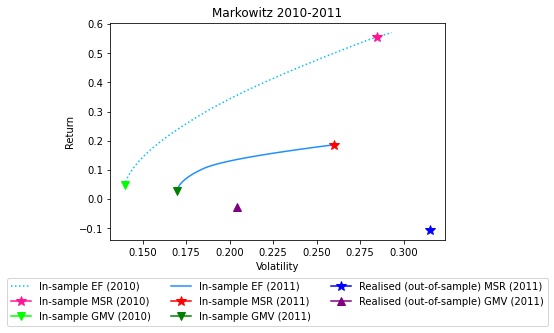

In [12]:
fun.plot_all(rf, ann_returns_2010, ann_cov_2010, ann_returns_2011, ann_cov_2011,
             title='Markowitz 2010-2011',
             name_1='In-sample EF (2010)',
             name_2='In-sample MSR (2010)', 
             name_3='In-sample GMV (2010)', 
             name_4='In-sample EF (2011)', 
             name_5='In-sample MSR (2011)', 
             name_6='In-sample GMV (2011)', 
             name_7='Realised (out-of-sample) MSR (2011)', 
             name_8='Realised (out-of-sample) GMV (2011)', 
             ew=False, grid=False, crisis=False)

On the graph, we can see two efficient frontiers: 
- a dotted line represents an efficient frontier computed from the historical data for 2010; a green triangle is the GMV portfolio and a pink star is the MSR portfolio; this is what we expected to get;
- a purple triangle represents our actual (out-of-sample) GMV portfolio in 2011, and a blue star - our realized (out-of-sample) MSR portfolio in 2011; it can be seen that our out-of-sample portfolios are extremely far from the expected ones;
- a solid line is an efficient frontier computed from the historical data for 2011 (a dark-green star - for GMV portfolio, a red star - for MSR portfolio) ; this is where we could have ended up in the best case scenario; but neither our expected, not realized portfolios are located on it.   

## 2. Resampling

Resampling, invented and patented by Richard Michaud and Robert Michaud, is one of the so-called robust methods of portfolio optimization.

Steps that we will perform in this section are the same as those that we made for Markowitz, with the only one, but very crucial difference. In Resampling, to define weighs of our in-sample MSR and GMV portfolios, we will have to follow a more sophisticated algorithm. But let's start from the beginning.

### 2.1. "In-sample" portfolios (2010)

2.1.1. As inputs, we will use the same data as previously, meaning that we will first take historical returns and covariance matrix of 2010, and a predefined risk-free rate. Nothing new here.

2.1.2. However, to compute weights of our targeted portfolios (MSR and GMV), we cannot use functions fun.msr() and gmv.msr(); instead, we will have use new functions: r_ef() and msr_resampled() or gmv_resampled().

The first function r_ef() (r_ef is an abbreviation of "resampled efficient frontier") implements the Resampling procedure:
- using our historic annualized returns and covariance, it simulates 500 sets of annualized returns and covariances; here we use a so-called Monte Carlo simulation;
- then it takes 200 equally spaced return points and for each of the points, computes 500 sets of optimal portfolios (out of sets of previously simulated returns and covariances); optimal portfolios mean their constituents have weights that give the lowest possible portfolio volatility for a given return point;  
- next, our function finds averaged portfolio weights for each return point, and for each set of averaged portfolio weights, it computes final portfolio return and volatility, using our historic annualized returns and covariance;
- finally, for each of 200 optimal portfolios, we compute their return and volatility; by connecting these points on a graph (x-axis represents volatilities and y-axis - returns), we get a resampled efficient frontier.

The second and third fucntions (msr_resampled() and gmv_resampled()) are needed to identify weights of our targeted portfolios (MSR and GMV) on the resampled efficient frontier, and their returns and volatilities.

In [13]:
# Function fun.r_ef() includes a Monte Carlo simulation, meaning that every time we run this code, we will get slightly 
# different results. To avoid this and to get the same reproducible result regardless of the number of times the simulation is run,
# we need to use np.random.seed(0).

# REF_sd stands for volatility, REF_mean for expected returns.

# It takes quite some time to run this code, as it involves simulation.

np.random.seed(0)
REF_sd, REF_mean, REF_weights = fun.r_ef(ann_returns_2010, ann_cov_2010)

In [14]:
msr_ref_ret, msr_ref_vol, msr_sharpe_ratio, msr_ref_weights = fun.msr_resampled(REF_mean, REF_sd, REF_weights, rf)
gmv_ref_ret, gmv_ref_vol, gmv_sharpe_ratio, gmv_ref_weights = fun.gmv_resampled(REF_mean, REF_sd, REF_weights, rf)

In [15]:
pd.DataFrame({'Weights resampled MSR 2010': msr_ref_weights.round(4),
             'Weights resampled GMV 2010': gmv_ref_weights.round(4)}, ann_returns_2010.index)

,Weights resampled MSR 2010,Weights resampled GMV 2010
AHOLD DELHAIZE,0.000,0.4251
L'AIR LIQUIDE,0.000,0.0225
BASF,0.000,0.0359
SAINT GOBAIN,0.000,0.0066
ENDESA,0.000,0.0644
KERING,0.014,0.0352
L'OREAL,0.000,0.0646
LVMH,0.986,0.0099
MUNICH INSURANCE,0.000,0.2456
SANOFI,0.000,0.0903


Let us compare the above weights with those computed by the Markowitz optimization mechanism.

We can see that our resampled and Markowitz MSR portfolios are almost identical: they include same two constituents out of ten, only their weights differ. Interesting fact is that resampling gave us even more concentrated allocation (almost 99% in LVMH).

Speaking of the resampled GMV portfolio, it is much more diversified than the Markowitz's one: it includes all ten constituents while the Markowitz GMV portfolio included only four assets. However, in resampled and Markowitz GMV portfolios same constituents dominate: AHOLD DELHAIZE with 42.51% and 53.95%, and MUNICH INSURANCE with 24.56% and 38.36%, respectively.

In [16]:
pd.concat([pd.DataFrame({'In-sample res MSR 2010': msr_ref_ret.round(4),
             'In-sample res GMV 2010': gmv_ref_ret.round(4)}, index = ['Portfolio return']),
           pd.DataFrame({'In-sample res MSR 2010': msr_ref_vol.round(4),
             'In-sample res GMV 2010': gmv_ref_vol.round(4)}, index = ['Portfolio volatility']),
          pd.DataFrame({'In-sample res MSR 2010': msr_sharpe_ratio.round(4),
             'In-sample res GMV 2010': gmv_sharpe_ratio.round(4)}, index = ['Sharpe ratio'])
          ], axis=0)

,In-sample res MSR 2010,In-sample res GMV 2010
Portfolio return,0.5683,0.0558
Portfolio volatility,0.2918,0.1475
Sharpe ratio,1.8964,0.2762


From the table above, we can see that expected risk-return characterictics for the resampled and Markowitz portfolios are almost the same.  

Before we proceed to compute realized portfolios in 2011, let us draw a resampled efficient frontier for 2010 and see where it is located compared to the Markowitz efficient frontier. Resampled EF should appear a bit lower than Markowitz EF.

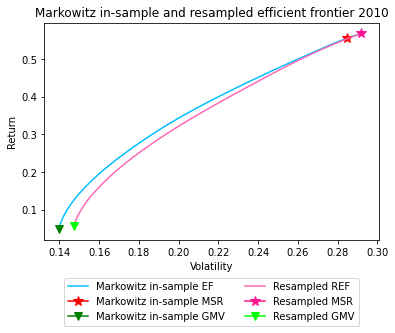

In [17]:
fun.plot_ref_all(REF_mean, REF_sd, REF_weights, ann_returns_2010, ann_cov_2010, rf,
                 title='Markowitz in-sample and resampled efficient frontier 2010',
                 name_1='Markowitz in-sample EF', 
                 name_2='Markowitz in-sample MSR', 
                 name_3='Markowitz in-sample GMV',
                 name_4='Resampled REF',
                 name_5='Resampled MSR', 
                 name_6='Resampled GMV',
                 name_7='_',
                 name_8='_', 
                 show_msr_gmv=False, ew=False, grid=False, crisis=False)

### 2.2. Out-of-sample portfolios (2011)

2.2.1. To compute our realized (out-of-sample) portfolios in 2011, we will use weights that we abtained above using the resampling mechanism, and historical data for 2011 (this data was already once uploaded, so we do not repeat it here). 

2.2.2. Returns and volatilities of our out-of-sample portfolios are as follows:

In [18]:
# MSR portfolio
ret_res_out_msr_2011 = fun.portfolio_return(msr_ref_weights, ann_returns_2011)
vol_res_out_msr_2011 = fun.portfolio_vol(msr_ref_weights, ann_cov_2011)
sharpe_res_out_msr_2011 = fun.sharpe(ret_res_out_msr_2011, vol_res_out_msr_2011, rf)

# GMV portfolio
ret_res_out_gmv_2011 = fun.portfolio_return(gmv_ref_weights, ann_returns_2011)
vol_res_out_gmv_2011 = fun.portfolio_vol(gmv_ref_weights, ann_cov_2011)
sharpe_res_out_gmv_2011 = fun.sharpe(ret_res_out_gmv_2011, vol_res_out_gmv_2011, rf)

# Putting the computed characteristics into a table
pd.concat([pd.DataFrame({'Out-of-sample res MSR 2011': ret_res_out_msr_2011.round(4),
             'Out-of-sample res GMV 2011': ret_res_out_gmv_2011.round(4)}, index = ['Portfolio return']),
           pd.DataFrame({'Out-of-sample res MSR 2011': vol_out_msr_2011.round(4),
             'Out-of-sample res GMV 2011': vol_res_out_gmv_2011.round(4)}, index = ['Portfolio volatility']),
          pd.DataFrame({'Out-of-sample res MSR 2011': sharpe_res_out_msr_2011.round(2),
             'Out-of-sample res GMV 2011': sharpe_res_out_gmv_2011.round(2)}, index = ['Sharpe ratio'])
          ], axis=0)

,Out-of-sample res MSR 2011,Out-of-sample res GMV 2011
Portfolio return,-0.1107,-0.0208
Portfolio volatility,0.3149,0.2017
Sharpe ratio,-0.3900,-0.1800


It can be seen that in terms of the risk-return characteristics, our resampled realized portfolios are almost the same as Markowitz out-of-sample portfolios, meaning that even using resampling, we were not able to make a better "guess" about where to allocate our assets to achieve our goal (the highest Sharpe ratio or the lowest volatility). 

## 3. Black-Litterman Model

One more robust method of portfolio optimization is a Black-Litterman model created by Fischer Black and Robert Litterman.

As it could be already understood from the explanations above, the process of portfolio optimization consists of the two main ingredients:
- input parameters;
- allocation mechanism.

Markowitz used historical data as inputs and a mean-variance optimization algorithm. 

Michauds (resampling) also used historical parameters, but they modified the allocation algorithm by including resampling in it. 

By contrast, Black and Litterman whose model we will study in this section, focused on the input parameters: instead of using historical data, they proposed a way to incorporate views of an investor to get more realistic and reliable inputs; the rest is the same as in Markowitz: in fact, Black and Litterman used the same mean-variance optimization algorithm, just with new inputs. 

Before we move to computation of the parameters for the BL model, let us list all the steps that this method consists of (to get a general idea):

1) first, we need a so-called prior portfolio (market portfolio), in literature, a cap-weighted portfolio is taken as a prior portfolio, this means we need to take all our stocks (that we want to include in our investment universe) and compute their weights according to their market capitalization;

2) next, using a reverse engineering procedure, we extract from our prior portfolio implied returns for our stocks;

3) then, we obtain investor's views on returns that our stocks will give and combine them with implied returns; this way we get so-caller posterior returns and covariances; in this step we use a special formula, so-called "Black-Litterman Master's Formula"

4) as a final step, we simple input these posterior returns and covariances into the Markowitz optimizer and get wieghts of our MSR and GMV portfolios.

### 3.1. Input data and "in-sample" portfolios (2010)

To compute input parameters for the Black-Litterman model which are called posterior expected returns and covariances, we need to make several steps. First, we need to obtain so-called implied returns. Implied means that they are implied by the market.  

#### 3.1.1. Implied returns

Implied returns are computed using the following formula:

$$\pi = \delta\Sigma w$$

\begin{array}{ll}
w & \mbox{a column vector ($N \times 1$) of weights} \\
\Sigma & \mbox{a covariance matrix ($N \times N$) of the assets} \\
\delta & \mbox{an investor's risk aversion factor}  \\
\end{array}

As a result, we will get excess implied returns (returns without a risk-free rate).

However, before we can use the formula, we need to get market capitalization of our assets and, based on it, calculate weights of the constituents in our prior (cap-weighted) market portfolio.

Delta (investor's risk aversion factor) will be taken as 2.5 (average risk-aversion parameter).

In [19]:
delta = 2.5

In [20]:
mktcaps_2010 = pd.read_excel('Data.xlsx', 'Market caps 2010', index_col=[0])

# Market caps of our stocks are very large and they cannot be displayed properly here. Thus, we divided them by 1 000 000, 
# this means numbers below are in millions of euro. This will not affect our calculation of weights.
(mktcaps_2010/1000000).round(2)

,Market Cap 31.12.2010
Instrument,
AHOLD DELHAIZE,11771.08
L'AIR LIQUIDE,26876.44
BASF,54833.18
SAINT GOBAIN,20436.08
ENDESA,20428.62
KERING,15062.95
L'OREAL,49783.02
LVMH,60328.05
MUNICH INSURANCE,21381.75


In [21]:
mkt_weights_2010 = mktcaps_2010 / mktcaps_2010.sum()
new_column_name_2010 = ['Weights 31.12.2010']
mkt_weights_2010 = mkt_weights_2010.set_axis(new_column_name_2010, axis='columns')
mkt_weights_2010

,Weights 31.12.2010
Instrument,
AHOLD DELHAIZE,0.034255
L'AIR LIQUIDE,0.078213
BASF,0.159570
SAINT GOBAIN,0.059471
ENDESA,0.059449
KERING,0.043835
L'OREAL,0.144873
LVMH,0.175561
MUNICH INSURANCE,0.062223


In [22]:
mkt_weights_2010.sum()

Weights 31.12.2010    1.0
dtype: float64

In [23]:
# These are our implied returns (excess returns without the risk-free rate)

pi_2010 = fun.implied_excess_returns(delta, ann_cov_2010, mkt_weights_2010)
pi_2010.round(4)

AHOLD DELHAIZE      0.0396
L'AIR LIQUIDE       0.1158
BASF                0.1235
SAINT GOBAIN        0.1600
ENDESA              0.0866
KERING              0.1134
L'OREAL             0.1030
LVMH                0.1405
MUNICH INSURANCE    0.0688
SANOFI              0.0957
dtype: float64

In [24]:
# These are implied returns including the risk-free rate

full_ir_2010 = rf + pi_2010
full_ir_2010.round(4)

AHOLD DELHAIZE      0.0546
L'AIR LIQUIDE       0.1308
BASF                0.1385
SAINT GOBAIN        0.1750
ENDESA              0.1016
KERING              0.1284
L'OREAL             0.1180
LVMH                0.1555
MUNICH INSURANCE    0.0838
SANOFI              0.1107
dtype: float64

#### 3.1.2. Investor's views

Besides implied returns, we can include in our model investor's own estimations on how the market will develop. This is the main specificity that makes the Black-Litterman stand out. Interestingly, views can be complete (generated for all the constituents) or partial, as well as absolute ("Return of this stock will be 3%) or relative ('Return of the stock A will be 3% higher that that of the stock B"). 

Let's assume our investor thinks that BASF, SAINT GOBAIN, ENDESA, LVMH and MUNICH INSURANCE will give negative returns of -3%, -5%, -4%, -3% and -4%, respectively. These are partial absolute views.  

In [25]:
# Here we indicate EXCESS investor's views, meaning that we need to substract the risk-free rate (which is 1.5%)
# from the returns shown above

constituents_with_views = ['BASF', 'SAINT GOBAIN', 'ENDESA', 'LVMH', 'MUNICH INSURANCE']
views_excess_2010 = pd.Series([-0.015, -0.035, -0.025, -0.015, -0.025], index=constituents_with_views)
views_excess_2010

BASF               -0.015
SAINT GOBAIN       -0.035
ENDESA             -0.025
LVMH               -0.015
MUNICH INSURANCE   -0.025
dtype: float64

Using our views, we need to create a so-called projection matrix that will link each view to its corresponding stock. It's a K x N matrix, where K is a number views (5 in this case) and N is a total number of constituents that we have, not only those with views (in our case we have 10 stocks in total). 

If a constituent has a view, then in a cell that is located in intersection between this stock (column) and a corresponding view (row), we will put 1, all the other cells will contain 0. Our projection matrix will look like this:

In [26]:
p = pd.DataFrame(np.zeros((5, 10)), columns=ann_returns_2010.index)
p.iloc[0]['BASF'] = 1
p.iloc[1]['SAINT GOBAIN'] = 1
p.iloc[2]['ENDESA'] = 1
p.iloc[3]['LVMH'] = 1
p.iloc[4]['MUNICH INSURANCE'] = 1
p

,AHOLD DELHAIZE,L'AIR LIQUIDE,BASF,SAINT GOBAIN,ENDESA,KERING,L'OREAL,LVMH,MUNICH INSURANCE,SANOFI
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


One more element that we need to compute and which is related to views, is a covariance matrix for views (covariance of the estimated view mean returns about the actual view mean returns). Formula for it is as follows:
 
$$\Omega = diag(P (\tau \Sigma) P^T) $$

However, we will not compute it here, as it will be automatically included in a fuction for calculation of final returns and covariances.

#### 3.1.3. Posterior returns (implied returns and views combined)

Now we are in a position to mix implied returns and views to get final expected returns and covariances.
The so-called Black-Litterman "master's formula" will help us to do it (a version modified by J. Walters): 

\begin{equation}
\label{eq:blMu}
\mu^{BL} = \pi + \tau \Sigma P^T[(P \tau \Sigma P^T) + \Omega]^{-1}[Q - P \pi]
\end{equation}

\begin{equation}
\label{eq:blSigma}
\Sigma^{BL} = \Sigma + \tau \Sigma - \tau\Sigma P^T(P \tau \Sigma P^T + \Omega)^{-1} P \tau \Sigma
\end{equation}

where:

\begin{array}{ll}
\Sigma & \mbox{a covariance matrix ($N \times N$) of the assets} \\
\delta & \mbox{an investor's risk aversion factor}  \\
Q & \mbox{a $K \times 1$ active (excess) views matrix} \\
P & \mbox{a $K \times N$ projection matrix, linking each view to a stock} \\
\Omega & \mbox{a covariance of the estimated view mean returns about the actual view mean returns} \\
\tau & \mbox{a scalar indicating the uncertainty of the prior}
\end{array}

The formulas look quite intimidating but actually we already have almost all the necessary ingredients, we just need to paste them into the formulas.

The only additional parameter that remained untouched so far, is a tuning parameter tau. To calculate it we need to divide 1 by the number of samples that we used to compute our historic returns. For this notebook, annualized returns were computed from daily stock prices, thus, our divisor equals to 255 (number of banking days per year). 

In [27]:
tau = 1/255
tau

0.00392156862745098

Now, let us use a function fun.black_litterman() and compute black-litterman posterior (final) returns and covariances:

In [28]:
# Attention, BL masters formula (and the function fun.black_litterman()) computes excess returns, 
# thus, we will have to add the risk-free rate to get full expected returns that we will feed into our optimizer

excess_mu_bl_2010, cov_bl_2010 = fun.black_litterman(ann_cov_2010, mkt_weights_2010, views_excess_2010, p, delta=delta, tau=tau)

In [29]:
excess_mu_bl_2010

AHOLD DELHAIZE      0.005746
L'AIR LIQUIDE       0.016153
BASF                0.014021
SAINT GOBAIN        0.009761
ENDESA             -0.000924
KERING              0.014765
L'OREAL             0.019400
LVMH                0.018399
MUNICH INSURANCE   -0.001232
SANOFI              0.019291
dtype: float64

In [30]:
mu_bl_2010 = excess_mu_bl_2010 + rf
mu_bl_2010

AHOLD DELHAIZE      0.020746
L'AIR LIQUIDE       0.031153
BASF                0.029021
SAINT GOBAIN        0.024761
ENDESA              0.014076
KERING              0.029765
L'OREAL             0.034400
LVMH                0.033399
MUNICH INSURANCE    0.013768
SANOFI              0.034291
dtype: float64

In [31]:
cov_bl_2010

,AHOLD DELHAIZE,L'AIR LIQUIDE,BASF,SAINT GOBAIN,ENDESA,KERING,L'OREAL,LVMH,MUNICH INSURANCE,SANOFI
AHOLD DELHAIZE,0.027843,0.016788,0.012936,0.023548,0.016934,0.017935,0.012693,0.019035,0.009407,0.014163
L'AIR LIQUIDE,0.016788,0.061685,0.051800,0.069056,0.035806,0.044827,0.040769,0.056146,0.027349,0.038596
BASF,0.012936,0.051800,0.072594,0.068390,0.031470,0.049027,0.041801,0.058941,0.030599,0.038300
SAINT GOBAIN,0.023548,0.069056,0.068390,0.129037,0.054143,0.064974,0.054547,0.078760,0.037620,0.049902
ENDESA,0.016934,0.035806,0.031470,0.054143,0.063629,0.037163,0.027953,0.040079,0.023018,0.028058
KERING,0.017935,0.044827,0.049027,0.064974,0.037163,0.075677,0.038900,0.058027,0.027715,0.035769
L'OREAL,0.012693,0.040769,0.041801,0.054547,0.027953,0.038900,0.055014,0.050861,0.024503,0.032357
LVMH,0.019035,0.056146,0.058941,0.078760,0.040079,0.058027,0.050861,0.086030,0.031509,0.042524
MUNICH INSURANCE,0.009407,0.027349,0.030599,0.037620,0.023018,0.027715,0.024503,0.031509,0.033167,0.023172
SANOFI,0.014163,0.038596,0.038300,0.049902,0.028058,0.035769,0.032357,0.042524,0.023172,0.048812


#### 3.1.4. Weights of MSR and GMV portfolios based on BL posterior returns and covariances 

To do this, we will use the same functions that we used before in Markowitz optimisation: fun.msr() and fun.gmv().

In [32]:
msr_2010_bl = fun.msr(rf, mu_bl_2010, cov_bl_2010)  
gmv_2010_bl = fun.gmv(cov_bl_2010)
pd.DataFrame({'Weights BL MSR 2010': msr_2010_bl.round(4),
             'Weights BL GMV 2010': gmv_2010_bl.round(4)}, ann_returns_2010.index)

,Weights BL MSR 2010,Weights BL GMV 2010
AHOLD DELHAIZE,0.0000,0.5387
L'AIR LIQUIDE,0.0000,0.0000
BASF,0.0000,0.0000
SAINT GOBAIN,0.0000,0.0000
ENDESA,0.0000,0.0000
KERING,0.0000,0.0000
L'OREAL,0.4267,0.0397
LVMH,0.0000,0.0000
MUNICH INSURANCE,0.0000,0.3840
SANOFI,0.5733,0.0376


Similarly to the Markowitz optimization, BL model resulted in a very concentrated, not diversified MSR portfolio with only two constituents: 42.62% in L'OREAL and 57.33% in SANOFI, although these constituents differ from those in Markowitz.

As for the GMV portfolio, BL and Markowitz portfolios contain exactly the same stocks with just tiny differencies in weights.

In [33]:
# BL MSR portfolio
ret_bl_msr_2010 = fun.portfolio_return(msr_2010_bl, mu_bl_2010)
vol_bl_msr_2010 = fun.portfolio_vol(msr_2010_bl, cov_bl_2010)
sharpe_bl_msr_2010 = fun.sharpe(ret_bl_msr_2010, vol_bl_msr_2010, rf)

# BL GMV portfolio
ret_bl_gmv_2010 = fun.portfolio_return(gmv_2010_bl, mu_bl_2010)
vol_bl_gmv_2010 = fun.portfolio_vol(gmv_2010_bl, cov_bl_2010)
sharpe_bl_gmv_2010 = fun.sharpe(ret_bl_gmv_2010, ret_bl_gmv_2010, rf)

# Putting the computed characteristics into a table
pd.concat([pd.DataFrame({'In-sample BL MSR 2010': ret_bl_msr_2010.round(4),
             'In-sample BL GMV 2010': vol_bl_msr_2010.round(4)}, index = ['Portfolio return']),
           pd.DataFrame({'In-sample BL MSR 2010': ret_bl_gmv_2010.round(4),
             'In-sample BL GMV 2010': vol_bl_gmv_2010.round(4)}, index = ['Portfolio volatility']),
          pd.DataFrame({'In-sample BL MSR 2010': sharpe_bl_msr_2010.round(2),
             'In-sample BL GMV 2010': sharpe_bl_gmv_2010.round(2)}, index = ['Sharpe ratio'])
          ], axis=0)

,In-sample BL MSR 2010,In-sample BL GMV 2010
Portfolio return,0.0343,0.2047
Portfolio volatility,0.0191,0.1402
Sharpe ratio,0.0900,0.2200


Compared to Markowitz and Resampling, BL gave much more moderate expectations about MSR portfolio returns and Sharpe ratio. However, for the GMV portfolio, extimations are almost the same.  

### 3.2. Out-of-sample portfolios (2011)

In [34]:
# BL MSR portfolio
ret_out_bl_msr_2011 = fun.portfolio_return(msr_2010_bl, ann_returns_2011).round(4)
vol_out_bl_msr_2011 = fun.portfolio_vol(msr_2010_bl, ann_cov_2011).round(4)
sharpe_out_bl_msr_2011 = fun.sharpe(ret_out_bl_msr_2011, vol_out_bl_msr_2011, rf).round(2)

# BL GMV portfolio
ret_out_bl_gmv_2011 = fun.portfolio_return(gmv_2010_bl, ann_returns_2011).round(4)
vol_out_bl_gmv_2011 = fun.portfolio_vol(gmv_2010_bl, ann_cov_2011).round(4)
sharpe_out_bl_gmv_2011 = fun.sharpe(ret_out_bl_gmv_2011, vol_out_bl_gmv_2011, rf).round(2)

# Putting the computed characteristics into a table
pd.concat([pd.DataFrame({'Out-of-sample BL MSR 2011': ret_out_bl_msr_2011,
             'Out-of-sample BL GMV 2011': ret_out_bl_gmv_2011}, index = ['Portfolio return']),
           pd.DataFrame({'Out-of-sample BL MSR 2011': vol_out_bl_msr_2011,
             'Out-of-sample BL GMV 2011': vol_out_bl_gmv_2011}, index = ['Portfolio volatility']),
          pd.DataFrame({'Out-of-sample BL MSR 2011': sharpe_out_bl_msr_2011,
             'Out-of-sample BL GMV 2011': sharpe_out_bl_gmv_2011}, index = ['Sharpe ratio'])
          ], axis=0)

,Out-of-sample BL MSR 2011,Out-of-sample BL GMV 2011
Portfolio return,0.0944,-0.0263
Portfolio volatility,0.2207,0.2041
Sharpe ratio,0.3600,-0.2000


The table above shows that if we invested in stocks using weights computed with the help of the Black-Litterman model, our MSR portfolio would give us much better returns and Sharpe ratio (total return of 9.44%, or 0.36% per unit of risk compared to -11.07% and -0.39%, respectively). However, our BL GMV portfolio does not differ much from Markowitz or resampled GMV portfolios. 

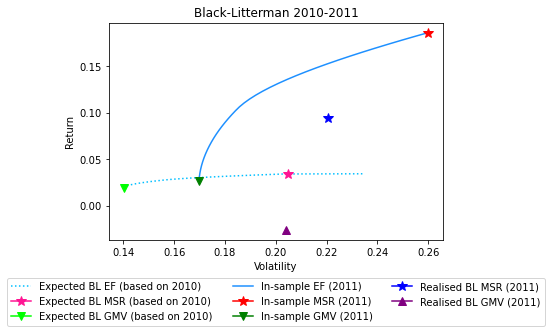

In [35]:
fun.plot_all(rf, mu_bl_2010, cov_bl_2010, ann_returns_2011, ann_cov_2011,
             title='Black-Litterman 2010-2011',
             name_1='Expected BL EF (based on 2010)',
             name_2='Expected BL MSR (based on 2010)', 
             name_3='Expected BL GMV (based on 2010)', 
             name_4='In-sample EF (2011)', 
             name_5='In-sample MSR (2011)', 
             name_6='In-sample GMV (2011)', 
             name_7='Realised BL MSR (2011)', 
             name_8='Realised BL GMV (2011)', 
             ew=False, grid=False)

Although the BL model gave us better results for MSR, the graph above shows that even BL was not able to "guess" a shape and location of efficient frontier.

## 4. Markowitz vs Resampling 2011-2019

Previously, we tested the three methods of portfolio optimization over one year only. Now let us take a bigger period, for example 9 year, from 2011 to 2019, and test the algorithms again. However, for the Black-Litterman model we need views, which are difficult to generate meaningfully. With random views, the method will not give the results it is supposed to give. Thus, let us test the two remainimg methods (Markowitz and Resampling) and compare our final results.

### 4.1. MSR portfolios

First, we test MSR portfolios. Here we do not show the process of testing itself as it would take a lot of time to run all the codes (and, actually, it is just a multiple repetition of what we did before). However, we share the results that can be found in the accompanying file "Data" on the sheets "Results MSR" and "Weights MSR".

There, risk-return characteristics of three portfolios can be found:
- 1st portfolio: In-sample MSR;
- 2d portfolio: Out-of-sample MSR (we take returns and covariance of the previous year and, based on them, computed weighs according to which we invest in the next year, then we take returns and covariances of this "next" year and calculate portfolio risk-return characteristics with the weights from the previous year);
- 3d portfolio: Out-of-sample resampled MSR (the only difference of this portfolio compared to the second one, is that weights were computed using resampling).  

In [36]:
msr = pd.read_excel('Data.xlsx','Results MSR',index_col=[0])
msr.head()

,Returns in-sample MSR,Volatility in-sample MSR,Sharpe ratio in-sample MSR,Returns out-of-sample MSR,Volatility out-of-sample MSR,Sharpe ratio out-of-sample MSR,Returns out-of-sample resampled MSR,Volatility out-of-sample resampled MSR,Sharpe ratio out-of-sample resampled MSR
2011,0.1860,0.2600,0.66,-0.1074,0.3149,-0.39,-0.1107,0.3199,-0.39
2012,0.3978,0.1896,2.02,0.2580,0.2102,1.16,0.2472,0.2045,1.14
2013,0.3226,0.1653,1.86,0.1652,0.1785,0.84,0.1124,0.1727,0.56
2014,0.2970,0.1653,1.71,0.2280,0.1399,1.52,0.2238,0.1480,1.41
2015,0.3070,0.2480,1.18,0.1684,0.1943,0.79,0.1351,0.2005,0.60


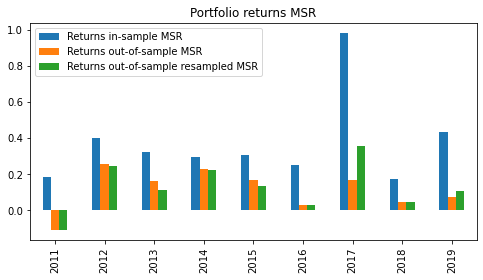

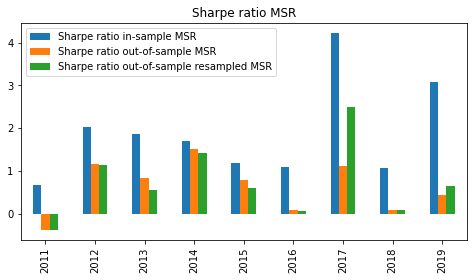

In [37]:
msr[['Returns in-sample MSR', 'Returns out-of-sample MSR', 'Returns out-of-sample resampled MSR']].plot.bar(title='Portfolio returns MSR', figsize = (8, 4))
msr[['Sharpe ratio in-sample MSR', 'Sharpe ratio out-of-sample MSR', 'Sharpe ratio out-of-sample resampled MSR']].plot.bar(title='Sharpe ratio MSR', figsize = (8, 4))
plt.show()

The graphs above show that neither Markowitz out-of-sample, nor resampled out-of-sample portfolios were able to correctly "guess" returns and Sharpe ratio of the in-sample portfolio. It also can be seen, that both Markowitz and resampled out-of-sample portfolios had more or less the same dynamics.

From the following graph and computed compounded and annualized returns, it can be seen that resampling gave slightly better returns than out-of-sample Markowitz (compounded return of 177% vs 154% and annualized return of almost 12% vs 11%). However, these numbers are still tiny compared to the in-sample Marokwitz.

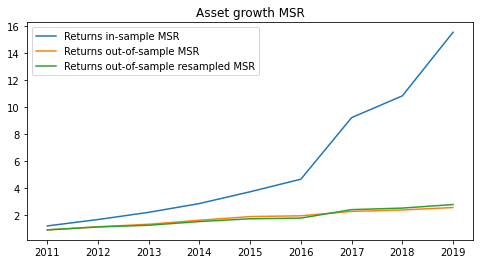

In [38]:
# Here we show a development of our assets (initial value is equal to 1) if we invested them in MSR portfolios

(msr[['Returns in-sample MSR', 'Returns out-of-sample MSR', 'Returns out-of-sample resampled MSR']] + 1).cumprod().plot(figsize=(8, 4), title='Asset growth MSR')
plt.show()

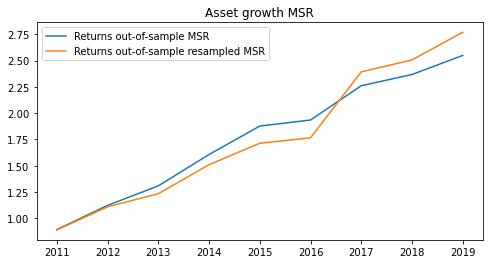

In [39]:
# Same graph as before but without the in-sample MSR portfolio

(msr[['Returns out-of-sample MSR', 'Returns out-of-sample resampled MSR']] + 1).cumprod().plot(figsize=(8, 4), title='Asset growth MSR')
plt.show()

In [40]:
fun.compound(msr[['Returns in-sample MSR', 'Returns out-of-sample MSR', 'Returns out-of-sample resampled MSR']])

Returns in-sample MSR                  14.534989
Returns out-of-sample MSR               1.549261
Returns out-of-sample resampled MSR     1.770007
dtype: float64

In [41]:
fun.annualized_returns(msr[['Returns in-sample MSR', 'Returns out-of-sample MSR', 'Returns out-of-sample resampled MSR']], 1)

Returns in-sample MSR                  0.356338
Returns out-of-sample MSR              0.109576
Returns out-of-sample resampled MSR    0.119862
dtype: float64

Next, let us take a look at the weights of the constituents of the MSR portfolios. The graph below proves that neither out-of-sample Markowitz, nor out-of-sample resampled portfolios could correctly stop the constituents and their weights of the Markowitz in-sample portfolio. Also we can see that both out-of-sample portfolios behave alike (almost alway the same constituents with the same weights). Plus, all the portfolios are very concentrated. 

In [42]:
msr_weights = pd.read_excel('Data.xlsx','Weights MSR',index_col=[0])
msr_weights.head()

,In-sample MSR 2011,Out-of-sample MSR 2011,Out-of-sample resampled MSR 2011,In-sample MSR 2012,Out-of-sample MSR 2012,Out-of-sample resampled MSR 2012,In-sample MSR 2013,Out-of-sample MSR 2013,Out-of-sample resampled MSR 2013,In-sample MSR 2014,...,Out-of-sample resampled MSR 2016,In-sample MSR 2017,Out-of-sample MSR 2017,Out-of-sample resampled MSR 2017,In-sample MSR 2018,Out-of-sample MSR 2018,Out-of-sample resampled MSR 2018,In-sample MSR 2019,Out-of-sample MSR 2019,Out-of-sample resampled MSR 2019
AHOLD DELHAIZE,0,0.0,0.0,0.0,0,0.038,0.3775,0.0,0.0056,0.2447,...,0.970,0,0.0000,0.0060,0.6407,0,0,0.0000,0.6407,0.6460
L'AIR LIQUIDE,0,0.0,0.0,0.0,0,0.000,0.0000,0.0,0.0006,0.0000,...,0.000,0,0.0000,0.0008,0.0000,0,0,0.0000,0.0000,0.0044
BASF,0,0.0,0.0,0.0,0,0.000,0.0000,0.0,0.0283,0.0000,...,0.000,0,0.5873,0.3759,0.0000,0,0,0.0000,0.0000,0.0000
SAINT GOBAIN,0,0.0,0.0,0.0,0,0.000,0.0254,0.0,0.0006,0.0000,...,0.002,0,0.0000,0.0030,0.0000,0,0,0.0000,0.0000,0.0001
ENDESA,0,0.0,0.0,0.0,0,0.000,0.4885,0.0,0.0069,0.7553,...,0.010,0,0.0000,0.0273,0.3217,0,0,0.0816,0.3217,0.1807


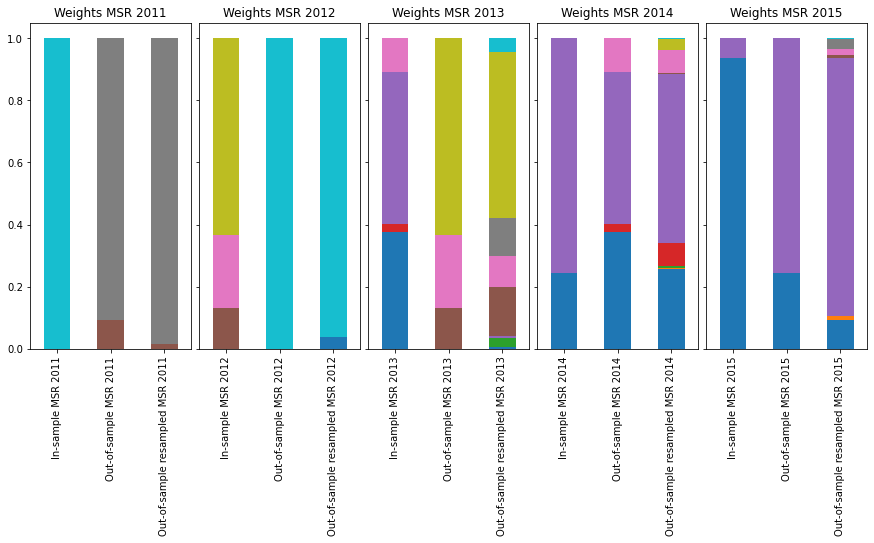

In [43]:
fig, (one_ax, two_ax, three_ax, four_ax, five_ax) = plt.subplots(nrows=1, ncols=5, sharey=True, gridspec_kw={'width_ratios':[1, 1, 1, 1, 1]}, figsize=(15, 6))
plt.subplots_adjust(wspace=0.05)

msr_weights[['In-sample MSR 2011', 'Out-of-sample MSR 2011', 'Out-of-sample resampled MSR 2011']].T.plot.bar(ax=one_ax, stacked=True, legend=False, title='Weights MSR 2011')
msr_weights[['In-sample MSR 2012', 'Out-of-sample MSR 2012', 'Out-of-sample resampled MSR 2012']].T.plot.bar(ax=two_ax, stacked=True, legend=False, title='Weights MSR 2012')
msr_weights[['In-sample MSR 2013', 'Out-of-sample MSR 2013', 'Out-of-sample resampled MSR 2013']].T.plot.bar(ax=three_ax, stacked=True, legend=False, title='Weights MSR 2013')
msr_weights[['In-sample MSR 2014', 'Out-of-sample MSR 2014', 'Out-of-sample resampled MSR 2014']].T.plot.bar(ax=four_ax, stacked=True, legend=False, title='Weights MSR 2014')
msr_weights[['In-sample MSR 2015', 'Out-of-sample MSR 2015', 'Out-of-sample resampled MSR 2015']].T.plot.bar(ax=five_ax, stacked=True, legend=False, title='Weights MSR 2015')
plt.show()

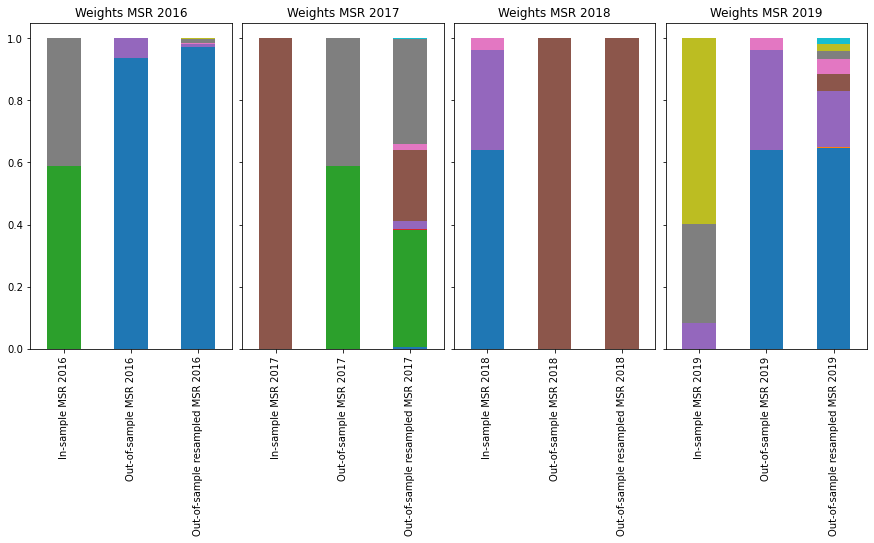

In [44]:
fig, (one_ax, two_ax, three_ax, four_ax) = plt.subplots(nrows=1, ncols=4, sharey=True, gridspec_kw={'width_ratios':[1, 1, 1, 1]}, figsize=(15, 6))
plt.subplots_adjust(wspace=0.05)

msr_weights[['In-sample MSR 2016', 'Out-of-sample MSR 2016', 'Out-of-sample resampled MSR 2016']].T.plot.bar(ax=one_ax, stacked=True, legend=False, title='Weights MSR 2016')
msr_weights[['In-sample MSR 2017', 'Out-of-sample MSR 2017', 'Out-of-sample resampled MSR 2017']].T.plot.bar(ax=two_ax, stacked=True, legend=False, title='Weights MSR 2017')
msr_weights[['In-sample MSR 2018', 'Out-of-sample MSR 2018', 'Out-of-sample resampled MSR 2018']].T.plot.bar(ax=three_ax, stacked=True, legend=False, title='Weights MSR 2018')
msr_weights[['In-sample MSR 2019', 'Out-of-sample MSR 2019', 'Out-of-sample resampled MSR 2019']].T.plot.bar(ax=four_ax, stacked=True, legend=False, title='Weights MSR 2019')
plt.show()

### 4.2. GMV portfolios

After MSR portfolios, les us take a look at the GMV portfolios. Here it makes sense to compare volatilities of  the portfolios. The graph below shows that both out-of-sample portfolios were able to track the volatility of the in-sample portfolio quite successfully. Thus, it is not a surptise, that risk-return characteristics of the three portfolios and their composition constituents-wise are much more similar to each other.

In [45]:
gmv = pd.read_excel('Data.xlsx','Results GMV',index_col=[0])
gmv.head()

,Returns in-sample GMV,Volatility in-sample GMV,Sharpe ratio in-sample GMV,Returns out-of-sample GMV,Volatility out-of-sample GMV,Sharpe ratio out-of-sample GMV,Returns out-of-sample resampled GMV,Volatility out-of-sample resampled GMV,Sharpe ratio out-of-sample resampled GMV
2011,0.0266,0.1698,0.07,-0.0262,0.2040,-0.20,-0.0208,0.2017,-0.18
2012,0.1379,0.1419,0.87,0.0866,0.1473,0.49,0.1065,0.1451,0.63
2013,0.1785,0.1386,1.18,0.2352,0.1529,1.44,0.2025,0.1489,1.26
2014,0.1400,0.1251,1.00,0.1217,0.1357,0.79,0.0875,0.1379,0.53
2015,0.1300,0.1640,0.70,0.1698,0.2019,0.77,0.1403,0.2042,0.61


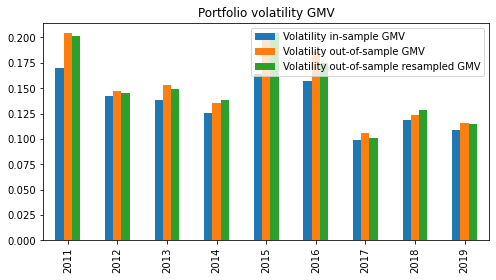

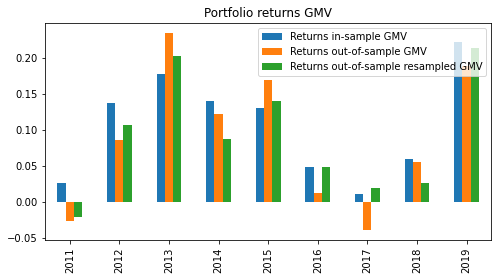

In [46]:
gmv[['Volatility in-sample GMV', 'Volatility out-of-sample GMV', 'Volatility out-of-sample resampled GMV']].plot.bar(title='Portfolio volatility GMV', figsize = (8, 4))
gmv[['Returns in-sample GMV', 'Returns out-of-sample GMV', 'Returns out-of-sample resampled GMV']].plot.bar(title='Portfolio returns GMV', figsize = (8, 4))
plt.show()

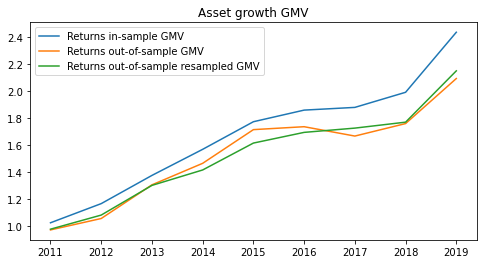

In [47]:
# Here we show a development of our assets (initial value is equal to 1) if we invested them in GMV portfolios

(gmv[['Returns in-sample GMV', 'Returns out-of-sample GMV', 'Returns out-of-sample resampled GMV']] + 1).cumprod().plot(figsize=(8, 4), title='Asset growth GMV')
plt.show()

In [48]:
fun.compound(gmv[['Returns in-sample GMV', 'Returns out-of-sample GMV', 'Returns out-of-sample resampled GMV']])

Returns in-sample GMV                  1.434789
Returns out-of-sample GMV              1.092645
Returns out-of-sample resampled GMV    1.149413
dtype: float64

In [49]:
fun.annualized_returns(gmv[['Returns in-sample GMV', 'Returns out-of-sample GMV', 'Returns out-of-sample resampled GMV']], 1)

Returns in-sample GMV                  0.103926
Returns out-of-sample GMV              0.085508
Returns out-of-sample resampled GMV    0.088741
dtype: float64

In [50]:
gmv_weights = pd.read_excel('Data.xlsx','Weights GMV',index_col=[0])
gmv_weights.head()

,In-sample GMV 2011,Out-of-sample GMV 2011,Out-of-sample resampled GMV 2011,In-sample GMV 2012,Out-of-sample GMV 2012,Out-of-sample resampled GMV 2012,In-sample GMV 2013,Out-of-sample GMV 2013,Out-of-sample resampled GMV 2013,In-sample GMV 2014,...,Out-of-sample resampled GMV 2016,In-sample GMV 2017,Out-of-sample GMV 2017,Out-of-sample resampled GMV 2017,In-sample GMV 2018,Out-of-sample GMV 2018,Out-of-sample resampled GMV 2018,In-sample GMV 2019,Out-of-sample GMV 2019,Out-of-sample resampled GMV 2019
AHOLD DELHAIZE,0.6058,0.5395,0.4251,0.4741,0.6058,0.5149,0.2143,0.4741,0.3719,0.2956,...,0.1172,0.1322,0.2518,0.1865,0.2261,0.1322,0.1193,0.1560,0.2261,0.2223
L'AIR LIQUIDE,0.0779,0.0000,0.0225,0.0550,0.0779,0.0947,0.4315,0.0550,0.0749,0.0000,...,0.0273,0.0649,0.1620,0.0961,0.0439,0.0649,0.0630,0.1218,0.0439,0.0844
BASF,0.0000,0.0000,0.0359,0.0000,0.0000,0.0071,0.0000,0.0000,0.0340,0.0000,...,0.0154,0.0862,0.0000,0.0608,0.0346,0.0862,0.0790,0.0654,0.0346,0.0233
SAINT GOBAIN,0.0000,0.0000,0.0066,0.0000,0.0000,0.0046,0.0125,0.0000,0.0153,0.0000,...,0.0523,0.0000,0.0000,0.0211,0.0760,0.0000,0.0667,0.0000,0.0760,0.0342
ENDESA,0.0000,0.0000,0.0644,0.0555,0.0000,0.0290,0.1118,0.0555,0.0773,0.1902,...,0.2878,0.1602,0.2999,0.2324,0.2084,0.1602,0.1422,0.2830,0.2084,0.1820


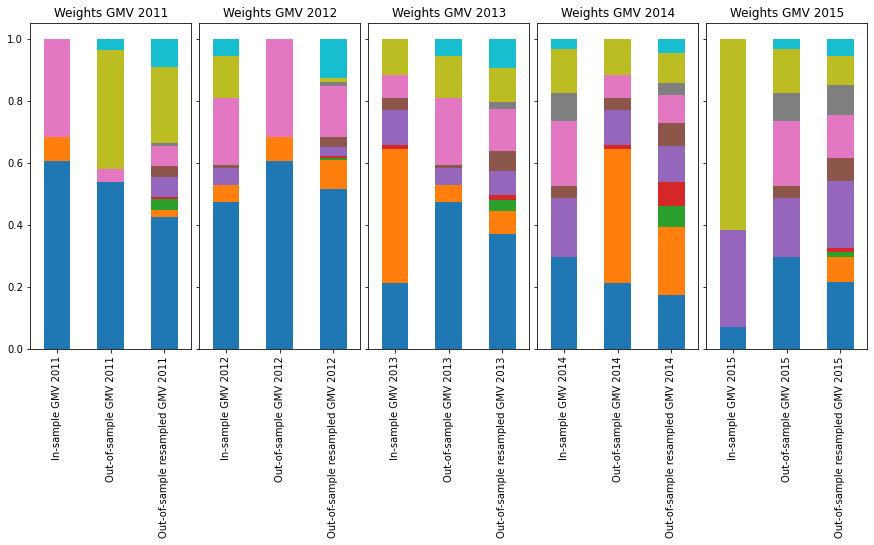

In [51]:
fig, (one_ax, two_ax, three_ax, four_ax, five_ax) = plt.subplots(nrows=1, ncols=5, sharey=True, gridspec_kw={'width_ratios':[1, 1, 1, 1, 1]}, figsize=(15, 6))
plt.subplots_adjust(wspace=0.05)
    
gmv_weights[['In-sample GMV 2011', 'Out-of-sample GMV 2011', 'Out-of-sample resampled GMV 2011']].T.plot.bar(ax=one_ax, stacked=True, legend=False, title='Weights GMV 2011')
gmv_weights[['In-sample GMV 2012', 'Out-of-sample GMV 2012', 'Out-of-sample resampled GMV 2012']].T.plot.bar(ax=two_ax, stacked=True, legend=False, title='Weights GMV 2012')
gmv_weights[['In-sample GMV 2013', 'Out-of-sample GMV 2013', 'Out-of-sample resampled GMV 2013']].T.plot.bar(ax=three_ax, stacked=True, legend=False, title='Weights GMV 2013')
gmv_weights[['In-sample GMV 2014', 'Out-of-sample GMV 2014', 'Out-of-sample resampled GMV 2014']].T.plot.bar(ax=four_ax, stacked=True, legend=False, title='Weights GMV 2014')
gmv_weights[['In-sample GMV 2015', 'Out-of-sample GMV 2015', 'Out-of-sample resampled GMV 2015']].T.plot.bar(ax=five_ax, stacked=True, legend=False, title='Weights GMV 2015')
plt.show()

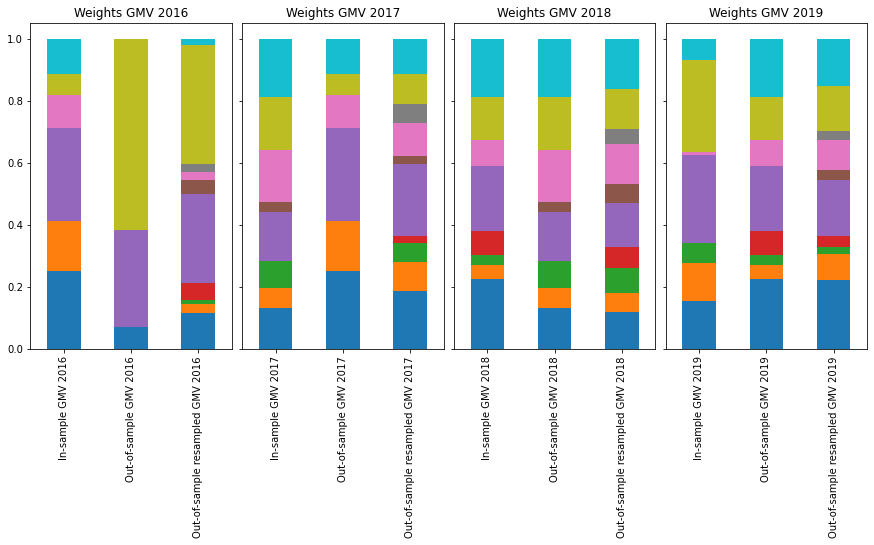

In [52]:
fig, (one_ax, two_ax, three_ax, four_ax) = plt.subplots(nrows=1, ncols=4, sharey=True, gridspec_kw={'width_ratios':[1, 1, 1, 1]}, figsize=(15, 6))
plt.subplots_adjust(wspace=0.05)
    
gmv_weights[['In-sample GMV 2016', 'Out-of-sample GMV 2016', 'Out-of-sample resampled GMV 2016']].T.plot.bar(ax=one_ax, stacked=True, legend=False, title='Weights GMV 2016')
gmv_weights[['In-sample GMV 2017', 'Out-of-sample GMV 2017', 'Out-of-sample resampled GMV 2017']].T.plot.bar(ax=two_ax, stacked=True, legend=False, title='Weights GMV 2017')
gmv_weights[['In-sample GMV 2018', 'Out-of-sample GMV 2018', 'Out-of-sample resampled GMV 2018']].T.plot.bar(ax=three_ax, stacked=True, legend=False, title='Weights GMV 2018')
gmv_weights[['In-sample GMV 2019', 'Out-of-sample GMV 2019', 'Out-of-sample resampled GMV 2019']].T.plot.bar(ax=four_ax, stacked=True, legend=False, title='Weights GMV 2019')
plt.show()

As it can be seen from the performed tests, Resampling does not look much more promissing than the Markowitz optimization when it comes to the MSR portfolio. The Black-Litterman, although we were not able to fully test it, seem to give better results if the views of an investor turn out to be correct. As for the GMV portfolio, all the methods generate more or less same results, it is because construction of the GMV portfolio always depend only on covariances and never take into account expected returns.

Besides the methods discussed in this notebook, there are other "robust" algorithms, for instance, Risk-Budgeting and Risk-Parity models that it would be interesting to test and compare with Markowitz, Resampling and Black-Litterman.